In [43]:
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
def adjust_close_price(price_file: str, dividend_file:str, ticker:str = 'ret'):
    df_price=pd.read_csv(
        filepath_or_buffer=price_file, 
        sep=',',  
        header=None, 
        names=['date', 'price'], 
        index_col=0, 
        skip_blank_lines=True,
        parse_dates=[0], 
        infer_datetime_format=True, 
        keep_date_col=False,  
        cache_dates=True, 
        skiprows=[0]
    )
    
    df_div=pd.read_csv(
        filepath_or_buffer=dividend_file, 
        sep=',',  
        header=None, 
        names=['date', 'div'], 
        index_col=0, 
        skip_blank_lines=True,
        parse_dates=[0], 
        infer_datetime_format=True, 
        keep_date_col=False,  
        cache_dates=True, 
        skiprows=[0]
    )

    df_total=df_price.merge(df_div, left_index=True, right_index=True, how='outer')
    df_total.loc[:, 'price'].fillna(method='pad', inplace=True)
    df_total.loc[:, 'div'].fillna(value=0, inplace=True)
    
    adj_factor = (df_total.loc[:, 'price'] - df_total.loc[:, 'div']) / df_total.loc[:, 'price']
    adj_close = adj_factor.sort_index(ascending=False).cumprod() * df_total.sort_index(ascending=False).loc[:, 'price']
    adj_close.rename(ticker, inplace=True)
    return adj_close.sort_index()

In [72]:
def calc_monthly_return(prices: pd.Series):
    return prices.pct_change().add(1.0).groupby(pd.Grouper(freq='M')).prod().sub(1.0)

In [73]:
adjusted_price = {}
adjusted_return = {}

In [74]:
price_file = './topix/newtopix/ニュートピックスインデックス_19900101-20210531.csv'
dividend_file = './topix/newtopix/ニュートピックスインデックス_dividend.csv'
return_file = './topix/newtopix/ニュートピックスインデックス_return_19900101-20210531.csv'
ticker = 'newtopix'

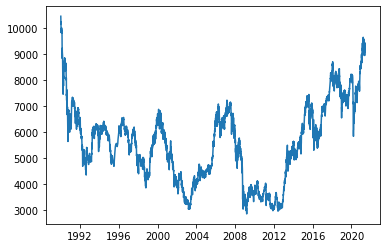

In [75]:
adjusted_price[ticker] = adjust_close_price(price_file, dividend_file, ticker)
adjusted_price[ticker].rename
plt.plot(adjusted_price[ticker])

date
1990-01-31   -0.049512
1990-02-28   -0.071565
1990-03-31   -0.136420
1990-04-30    0.016239
1990-05-31    0.093056
                ...   
2021-01-31    0.001385
2021-02-28    0.031232
2021-03-31    0.056661
2021-04-30   -0.028874
2021-05-31    0.013178
Freq: M, Name: newtopix, Length: 377, dtype: float64


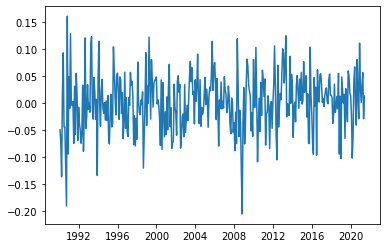

In [76]:
adjusted_return[ticker] = calc_monthly_return(adjusted_price[ticker])
plt.plot(adjusted_return[ticker])
print(adjusted_return[ticker])

date
1990-03-31         NaN
1990-04-30   -0.005225
1990-05-31    0.095097
1990-06-30   -0.037973
1990-07-31   -0.038018
                ...   
2021-01-31    0.001799
2021-02-28    0.030651
2021-03-31    0.056343
2021-04-30   -0.028813
2021-05-31    0.013136
Freq: M, Name: topixopen, Length: 375, dtype: float64


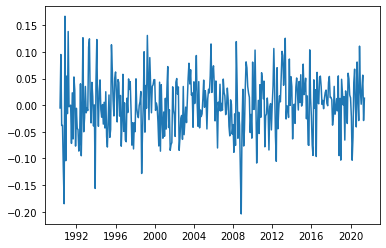

In [97]:
adjusted_return2 = adjusted_price[ticker].groupby(pd.Grouper(freq='M')).last().pct_change()
plt.plot(adjusted_return2)
print(adjusted_return2)

date
1990-01-01   -0.054042
1990-02-01   -0.071611
1990-03-01   -0.136420
1990-04-01    0.016239
1990-05-01    0.093056
                ...   
2021-01-01    0.001385
2021-02-01    0.031232
2021-03-01    0.056661
2021-04-01   -0.028874
2021-05-01    0.013178
Name: return, Length: 377, dtype: float64


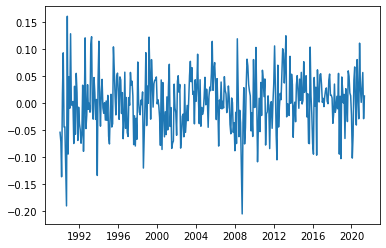

In [98]:
import numpy as np
f = '%Y%m'
my_parser = lambda d: pd.to_datetime(d, format=f)
df_ret=pd.read_csv(
    filepath_or_buffer=return_file, 
    sep=',',  
    header=None, 
    names=['date', 'return'], 
    index_col=0, 
    skip_blank_lines=True,
    parse_dates=[0], 
    date_parser=my_parser,
    keep_date_col=False,  
    cache_dates=True, 
    skiprows=[0],
    squeeze=True
)
plt.plot(df_ret)
print(df_ret)

In [78]:
price_file = './topix/indexopen/トピックス･インデックス･オープン_19900101-20210531.csv'
dividend_file = './topix/indexopen/トピックス･インデックス･オープンdividend.csv'
ticker = 'indexopen'

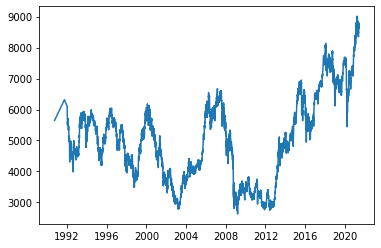

In [79]:
adjusted_price[ticker] = adjust_close_price(price_file, dividend_file, ticker)
plt.plot(adjusted_price[ticker])

date
1989-09-30    0.000000
1989-10-31    0.000000
1989-11-30    0.000000
1989-12-31    0.000000
1990-01-31    0.000000
                ...   
2021-01-31    0.001730
2021-02-28    0.030841
2021-03-31    0.056127
2021-04-30   -0.028782
2021-05-31    0.013184
Freq: M, Name: indexopen, Length: 381, dtype: float64


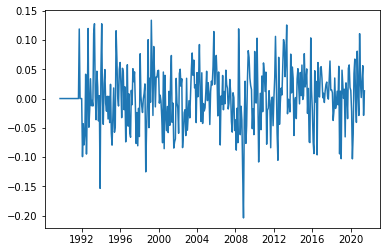

In [80]:
adjusted_return[ticker] = calc_monthly_return(adjusted_price[ticker])
plt.plot(adjusted_return[ticker])
print(adjusted_return[ticker])

In [81]:
price_file = './topix/topixindex/トピックス･インデックスファンド_19900101-20210531.csv'
dividend_file = './topix/topixindex/トピックス･インデックスファンドdividend.csv'
ticker = 'topixindex'

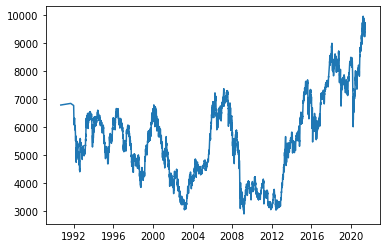

In [82]:
adjusted_price[ticker] = adjust_close_price(price_file, dividend_file, ticker)
plt.plot(adjusted_price[ticker])

date
1989-09-30    0.000000
1989-10-31    0.000000
1989-11-30    0.000000
1989-12-31    0.000000
1990-01-31    0.000000
                ...   
2021-01-31    0.001791
2021-02-28    0.030723
2021-03-31    0.056579
2021-04-30   -0.028826
2021-05-31    0.013204
Freq: M, Name: topixindex, Length: 381, dtype: float64


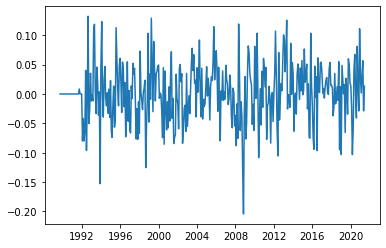

In [83]:
adjusted_return[ticker] = calc_monthly_return(adjusted_price[ticker])
plt.plot(adjusted_return[ticker])
print(adjusted_return[ticker])

In [84]:
price_file = './topix/TSP/インデックスファンドTSP_19900101-20210531.csv'
dividend_file = './topix/TSP/インデックスファンドTSPdividend.csv'
ticker = 'TSP'

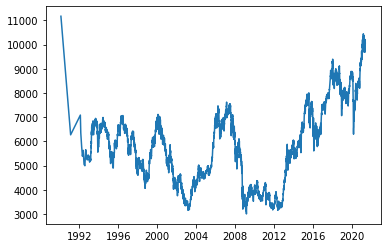

In [85]:
adjusted_price[ticker] = adjust_close_price(price_file, dividend_file, ticker)
plt.plot(adjusted_price[ticker])

date
1987-02-28    0.000000
1987-03-31    0.000000
1987-04-30    0.000000
1987-05-31    0.000000
1987-06-30    0.000000
                ...   
2021-01-31    0.001781
2021-02-28    0.031245
2021-03-31    0.056485
2021-04-30   -0.028736
2021-05-31    0.013183
Freq: M, Name: TSP, Length: 412, dtype: float64


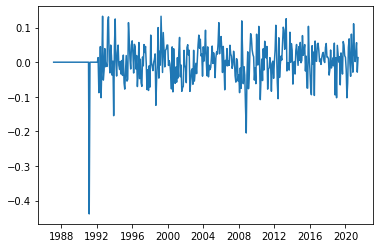

In [86]:
adjusted_return[ticker] = calc_monthly_return(adjusted_price[ticker])
plt.plot(adjusted_return[ticker])
print(adjusted_return[ticker])

In [87]:
price_file = './topix/topixopen/トピックスオープン_19900101-20210531.csv'
dividend_file = './topix/topixopen/トピックスオープンdividend.csv'
ticker = 'topixopen'

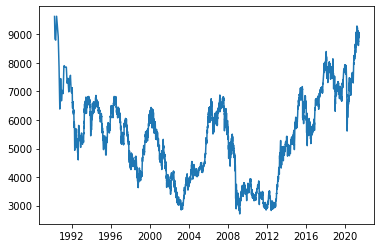

In [88]:
adjusted_price[ticker] = adjust_close_price(price_file, dividend_file, ticker)
plt.plot(adjusted_price[ticker])

date
1990-03-31   -0.081400
1990-04-30   -0.005225
1990-05-31    0.095097
1990-06-30   -0.037973
1990-07-31   -0.038018
                ...   
2021-01-31    0.001799
2021-02-28    0.030651
2021-03-31    0.056343
2021-04-30   -0.028813
2021-05-31    0.013136
Freq: M, Name: topixopen, Length: 375, dtype: float64


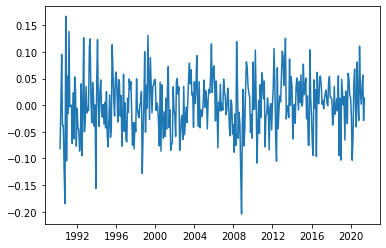

In [89]:
adjusted_return[ticker] = calc_monthly_return(adjusted_price[ticker])
plt.plot(adjusted_return[ticker])
print(adjusted_return[ticker])

In [90]:
adjusted_price

{'newtopix': date
 1990-01-04    10465.150253
 1990-01-05    10328.993618
 1990-01-08    10322.374893
 1990-01-09    10259.969768
 1990-01-10    10173.926339
                   ...     
 2021-05-25     9287.000000
 2021-05-26     9292.000000
 2021-05-27     9245.000000
 2021-05-28     9422.000000
 2021-05-31     9303.000000
 Name: newtopix, Length: 7797, dtype: float64,
 'indexopen': date
 1989-09-29            NaN
 1990-09-29    5645.870609
 1991-09-29    6317.153826
 1992-01-06    6099.796370
 1992-01-07    6035.724582
                  ...     
 2021-05-25    8668.000000
 2021-05-26    8673.000000
 2021-05-27    8629.000000
 2021-05-28    8794.000000
 2021-05-31    8684.000000
 Name: indexopen, Length: 7228, dtype: float64,
 'topixindex': date
 1989-09-19            NaN
 1990-09-19    6786.267456
 1991-09-19    6844.073817
 1992-01-06    6769.215200
 1992-01-07    6687.369779
                  ...     
 2021-05-25    9575.000000
 2021-05-26    9580.000000
 2021-05-27    9532.000000


In [91]:
adjusted_return

{'newtopix': date
 1990-01-31   -0.049512
 1990-02-28   -0.071565
 1990-03-31   -0.136420
 1990-04-30    0.016239
 1990-05-31    0.093056
                 ...   
 2021-01-31    0.001385
 2021-02-28    0.031232
 2021-03-31    0.056661
 2021-04-30   -0.028874
 2021-05-31    0.013178
 Freq: M, Name: newtopix, Length: 377, dtype: float64,
 'indexopen': date
 1989-09-30    0.000000
 1989-10-31    0.000000
 1989-11-30    0.000000
 1989-12-31    0.000000
 1990-01-31    0.000000
                 ...   
 2021-01-31    0.001730
 2021-02-28    0.030841
 2021-03-31    0.056127
 2021-04-30   -0.028782
 2021-05-31    0.013184
 Freq: M, Name: indexopen, Length: 381, dtype: float64,
 'topixindex': date
 1989-09-30    0.000000
 1989-10-31    0.000000
 1989-11-30    0.000000
 1989-12-31    0.000000
 1990-01-31    0.000000
                 ...   
 2021-01-31    0.001791
 2021-02-28    0.030723
 2021-03-31    0.056579
 2021-04-30   -0.028826
 2021-05-31    0.013204
 Freq: M, Name: topixindex, Length: 381,

In [92]:
adjusted_return['topixopen']

date
1990-03-31   -0.081400
1990-04-30   -0.005225
1990-05-31    0.095097
1990-06-30   -0.037973
1990-07-31   -0.038018
                ...   
2021-01-31    0.001799
2021-02-28    0.030651
2021-03-31    0.056343
2021-04-30   -0.028813
2021-05-31    0.013136
Freq: M, Name: topixopen, Length: 375, dtype: float64

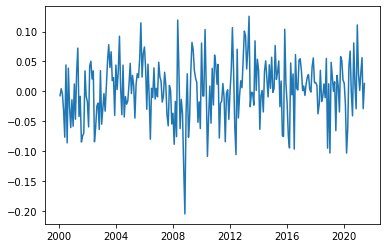

In [108]:
from functools import reduce
ave_return = reduce(lambda df1,df2: pd.merge(df1,df2,on='date'), adjusted_return.values()) \
    .loc['2000-01-31'::, :].mean(axis=1)
plt.plot(ave_return)